# Abalone Data Set

### We will be predicting the age of an abalone (number of rings).


## Getting Data

#### We begin by loading the data and creating a dummy variable for the sex of the abalone. 

In [1499]:
import numpy as np
import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()

ABALONE_PATH = os.path.join(cwd, "abalone.data")


def load_abalone_data(abalone_path = ABALONE_PATH):
    return pd.read_csv(ABALONE_PATH,  delimiter = ',', 
                       names = ['sex', 
                                'length', 
                                'diameter', 
                                'height', 
                                'whole_weight', 
                                'shucked_weight',
                                'viscera_weight', 
                                'shell_weight', 
                                'rings'])

data = load_abalone_data()

def create_dummy(data, column):
    dummy = pd.get_dummies(data[column])
    new_data = pd.concat([data, dummy], axis=1)
    return new_data

data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [1500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [1501]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### We can see that some of our data is inaccurate. We see that the height of the min albaone is 0, which is impossible. We will throw out these inaccurate data points.

In [1502]:
data = data[data.height > 0]
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Train-Test Split 

#### Now we will split our data into training and testing sets

In [1503]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=30)

## Data-Clean Up

#### We will clean up the training test data. First, we will convert the "sex" variable into a dummy variable.

In [1504]:
train = create_dummy(train, "sex")
train = train.drop("sex", axis=1)
train = train.drop("I", axis=1)

In [1505]:
train.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,0.524840,0.408729,0.139883,0.831941,0.360182,0.181041,0.240099,9.990719,0.316467,0.370659
std,0.118832,0.098019,0.042092,0.486864,0.220740,0.108752,0.138170,3.239594,0.465167,0.483054
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.448500,0.187000,0.094500,0.132000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.802750,0.336000,0.170500,0.235000,10.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.154000,0.503000,0.253625,0.330000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.657000,1.488000,0.590000,1.005000,29.000000,1.000000,1.000000


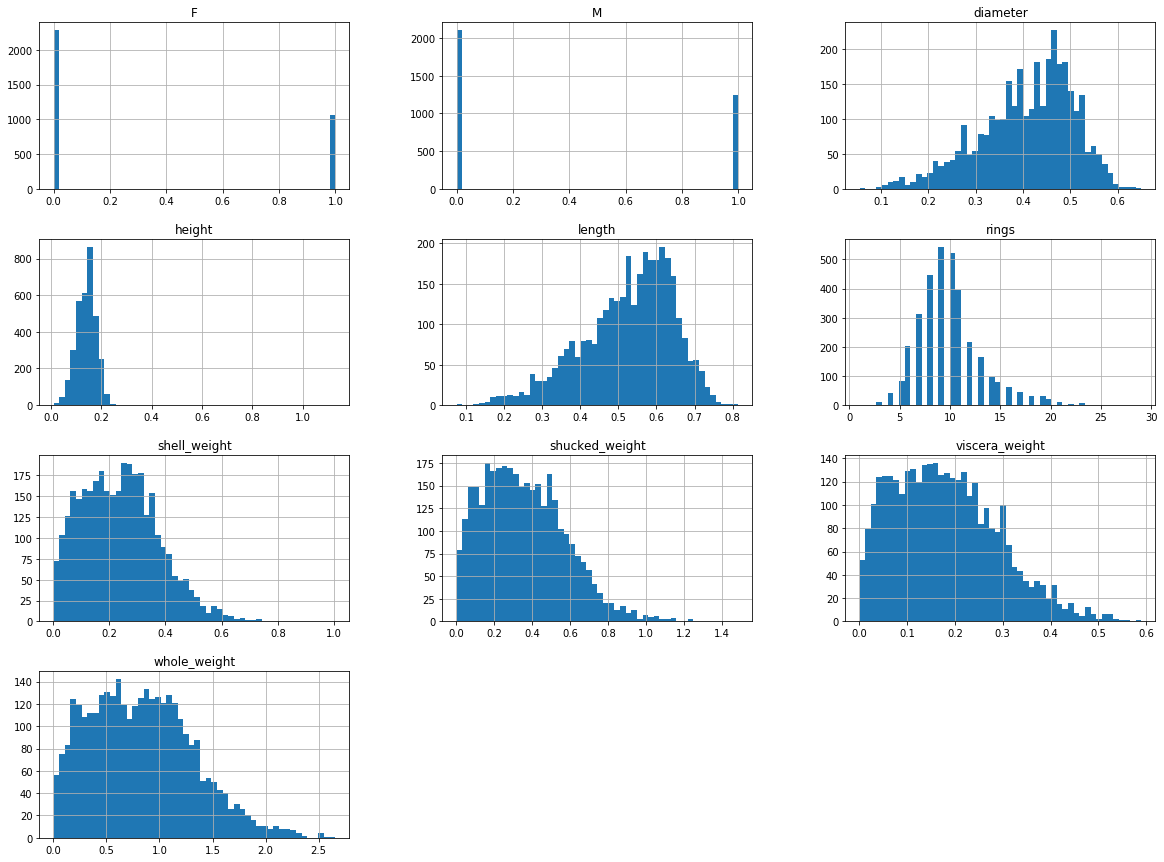

In [1506]:
train.hist(bins=50, figsize=(20,15))
plt.show()

#### From the histograms and data description table above, we can observe two things.
#### 1). The weight data is generally skewed to the right. We will have to standardize this data to make it more normally distributed (later in the process).
#### 1). There is an extreme outlier in height (1.13). Let's remove such extreme outliers from the data first.

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,M
count,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000
mean,0.524699,0.408608,0.139408,0.831037,0.359777,0.180878,0.239821,9.988909,0.315947,0.370803
std,0.118744,0.097941,0.037818,0.485865,0.220293,0.108598,0.137777,3.239866,0.464962,0.483092
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.448375,0.187000,0.094375,0.132000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.802500,0.335750,0.170250,0.235000,10.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502250,0.253500,0.330000,11.000000,1.000000,1.000000
max,0.800000,0.630000,0.240000,2.657000,1.488000,0.590000,1.005000,29.000000,1.000000,1.000000


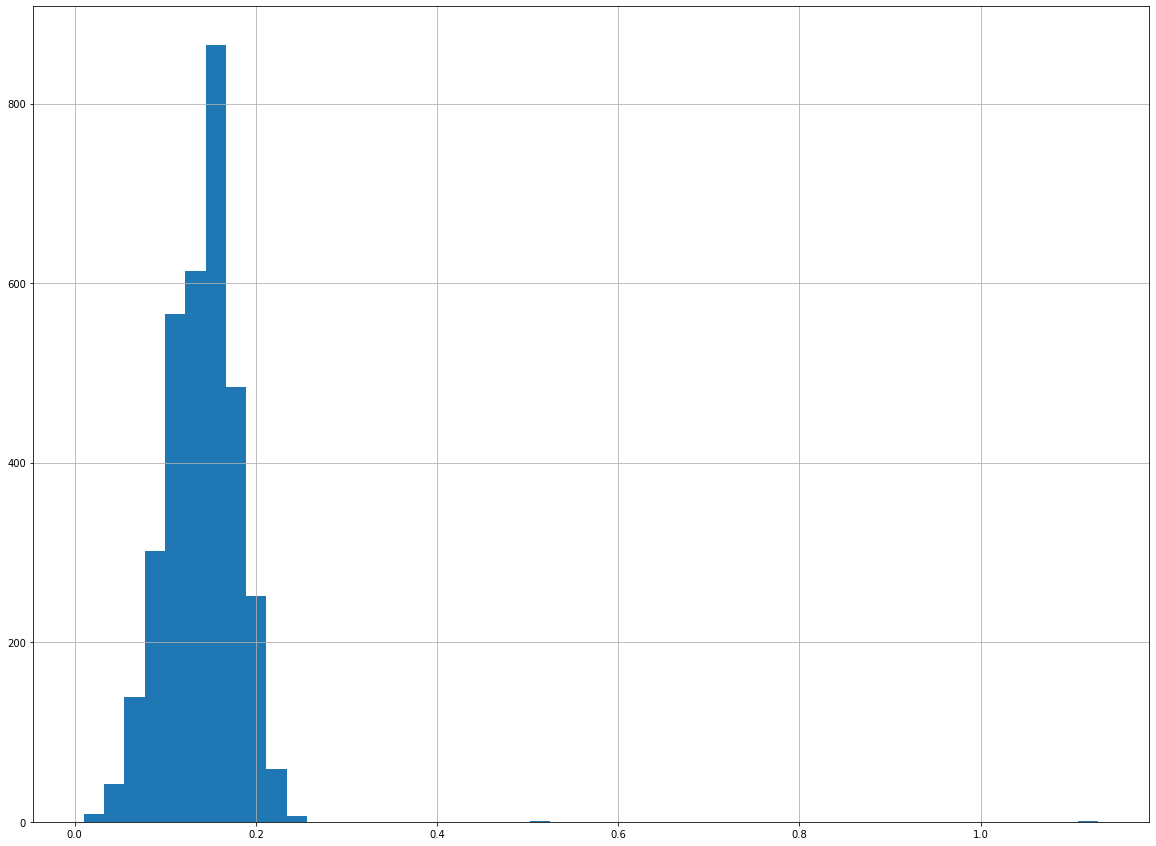

In [1507]:
train["height"].hist(bins=50, figsize=(20,15))
train = train[train.height < 0.25]
train.describe()

#### Now, we will see which features that we want to include in our models. From the correlation matrix below, we can see that all attributes except for female or male have a relatively positive correlation with age (rings). 

In [1508]:
corr_matrix = train.corr()
corr_matrix["rings"].sort_values(ascending=False)

rings             1.000000
shell_weight      0.620159
height            0.599964
diameter          0.561335
length            0.543512
whole_weight      0.529348
viscera_weight    0.493855
shucked_weight    0.406841
F                 0.254323
M                 0.171026
Name: rings, dtype: float64

#### With the scatter matrix below, we can see that generally, there is generally a slightly non-linear (more logistic) relationship between the weight attributes (whole_weight, shucked_weight, viscera_weight, shell_weight) and age (ring number). Length and diameter also have a slightly non-linear relationship. From this, we can predict that a logistic regression will better predict abalone age (number of rings) compared to a linear regression.


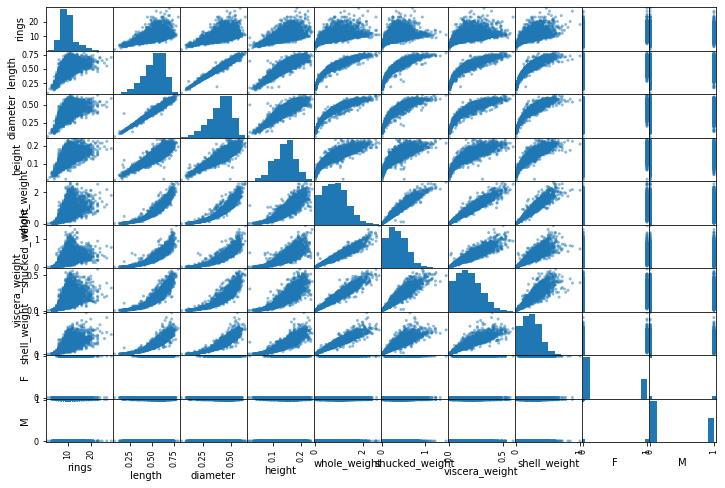

In [1509]:
from pandas.plotting import scatter_matrix

attributes = ['rings',
              'length', 
              'diameter', 
              'height', 
              'whole_weight', 
              'shucked_weight',
              'viscera_weight', 
              'shell_weight', 
              'F', 
              'M']
matrix = scatter_matrix(train[attributes], figsize=(12, 8))


#### We can also see from the correlation matrix that the sex of the abalone is a poor indicator of the number of rings (age). Thus, we will drop this from our regression

In [1510]:
train = train.drop("M", axis=1)
train = train.drop("F", axis=1)
train.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
3393,0.575,0.435,0.13,1.0105,0.3680,0.2220,0.3200,10
1409,0.660,0.515,0.17,1.3370,0.6150,0.3125,0.3575,10
2205,0.275,0.220,0.08,0.1365,0.0565,0.0285,0.0420,6
3194,0.610,0.470,0.16,1.0170,0.4260,0.2255,0.3200,12
112,0.435,0.320,0.08,0.3325,0.1485,0.0635,0.1050,9


#### We also observe that 'viscera_weight', 'shucked_weight', and 'whole_weight' aren't as positively correlated with the number of rings as the other features. We will run two models, one with all features except for 'sex' included and one with all features except for 'sex', viscera_weight', 'shucked_weight'.

#### We now begin splitting the data.

In [1511]:
train_y = train["rings"]
train_x = train.drop(columns=['rings'])
train_x_removed_features = train.drop(columns=['rings', 'viscera_weight','shucked_weight'])

test_y = test["rings"]
test_x = test.drop(columns=['rings', 'sex'])
test_x_removed_features = test.drop(columns=['sex','rings', 'viscera_weight', 'shucked_weight'])



#### As discussed previously, our data is skewed. We will apply a standard scaler to scale and standardize the data.

In [1512]:
from sklearn.preprocessing import StandardScaler

process = StandardScaler()

train_x = process.fit_transform(train_x)
train_x_removed_features = process.fit_transform(train_x_removed_features)


## Models

#### First, we'll write a function to evaluate all our models. This function returns the correct output within a certain acceptable range as well as the Mean Average Error.


In [1513]:
def evaluating_model(predictions, actual, acceptable_range):
    total = len(predictions)
    correct = 0
    mae = 0
    
    for i in range(total):
        difference = abs(predictions[i] - actual[i])
        if difference <= acceptable_range:
            correct += 1
        mae += difference
    
    percent_correct = (correct / total) * 100
    mae = mae / total
    
    print("{:0.2f}% correct within {} year(s) ({} correct guesses)".format(
            percent_correct, acceptable_range, correct))
    print("MAE: {}".format(mae))
        

## Linear Regressions

### Model with All Features (except 'sex')

In [1514]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

pred_lin = lin_reg.predict(test_x)

lin_mse = mean_squared_error(test_y, pred_lin)
lin_rmse = np.sqrt(lin_mse)

print("Test mse is {}, rmse is {}".format(lin_mse, lin_rmse))
evaluating_model(pred_lin, test_y.values, 1)
evaluating_model(pred_lin, test_y.values, 2)

Test mse is 13.452575604743819, rmse is 3.6677752936547
10.54% correct within 1 year(s) (88 correct guesses)
MAE: 3.3011490407123127
20.96% correct within 2 year(s) (175 correct guesses)
MAE: 3.3011490407123127


### Model with Removals ('sex', viscera_weight', 'shucked_weight')

In [1515]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(train_x_removed_features, train_y)

pred_lin_2 = lin_reg_2.predict(test_x_removed_features)

lin_mse_2 = mean_squared_error(test_y, pred_lin_2)
lin_rmse_2 = np.sqrt(lin_mse_2)

print("Test mse is {}, rmse is {}".format(lin_mse_2, lin_rmse_2))
evaluating_model(pred_lin_2, test_y.values, 1)
evaluating_model(pred_lin_2, test_y.values, 2)

Test mse is 15.384635195852011, rmse is 3.9223252282099215
21.68% correct within 1 year(s) (181 correct guesses)
MAE: 3.004048806377967
42.99% correct within 2 year(s) (359 correct guesses)
MAE: 3.004048806377967


## Logistic Regressions

### Model with All Features (except 'sex')

In [1516]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

pred_log = log_reg.predict(test_x)

log_mse = mean_squared_error(test_y, pred_log)
log_rmse = np.sqrt(log_mse)

print("Test mse is {}, rmse is {}".format(log_mse, log_rmse))
evaluating_model(pred_log, test_y.values, 1)
evaluating_model(pred_log, test_y.values, 2)

Test mse is 8.487425149700599, rmse is 2.9133185801934878
43.11% correct within 1 year(s) (360 correct guesses)
MAE: 2.207185628742515
65.03% correct within 2 year(s) (543 correct guesses)
MAE: 2.207185628742515


/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Model with Removals ('sex', viscera_weight', 'shucked_weight')

In [1517]:
log_reg_2 = LogisticRegression()
log_reg_2.fit(train_x_removed_features, train_y)

pred_log_2 = log_reg_2.predict(test_x_removed_features)

log_mse_2 = mean_squared_error(test_y, pred_log_2)
log_rmse_2 = np.sqrt(log_mse_2)

print("Test mse is {}, rmse is {}".format(log_mse_2, log_rmse_2))
evaluating_model(pred_log_2, test_y.values, 1)
evaluating_model(pred_log_2, test_y.values, 2)

/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test mse is 8.48383233532934, rmse is 2.9127018960630595
49.10% correct within 1 year(s) (410 correct guesses)
MAE: 2.117365269461078
69.22% correct within 2 year(s) (578 correct guesses)
MAE: 2.117365269461078


## Decision Trees

#### Now, let's try using a decision tree. After trial and error, it seems like a max_depth of 5 minimizes the errors.

In [1518]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(train_x, train_y)
pred_tree = tree.predict(test_x)

tree_mse = mean_squared_error(pred_tree, test_y)
tree_rmse = np.sqrt(tree_mse)

print("Tree mse is {}, rmse is {}".format(tree_mse, tree_rmse))
evaluating_model(pred_tree, test_y.values, 1)
evaluating_model(pred_tree, test_y.values, 2)

Tree mse is 10.193786171381532, rmse is 3.1927709237246464
29.82% correct within 1 year(s) (249 correct guesses)
MAE: 2.494173087211585
49.70% correct within 2 year(s) (415 correct guesses)
MAE: 2.494173087211585


In [1519]:
tree_2 = DecisionTreeRegressor(max_depth=9)
tree_2.fit(train_x_removed_features, train_y)
pred_tree_2 = tree_2.predict(test_x_removed_features)

tree_mse_2 = mean_squared_error(pred_tree_2, test_y)
tree_rmse_2 = np.sqrt(tree_mse_2)

print("Tree mse is {}, rmse is {}".format(tree_mse_2, tree_rmse_2))
evaluating_model(pred_tree_2, test_y.values, 1)
evaluating_model(pred_tree_2, test_y.values, 2)

Tree mse is 8.618971366899212, rmse is 2.935808469042082
34.85% correct within 1 year(s) (291 correct guesses)
MAE: 2.0948864120127983
62.63% correct within 2 year(s) (523 correct guesses)
MAE: 2.0948864120127983


## Gradient Boosted Trees

#### Trying Gradient boosted trees on different learning rates (referenced https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/) to learn how to test the different learning rates. 

In [1520]:
from sklearn.ensemble import GradientBoostingRegressor
learning_rate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rate_list:
    gb_tree = GradientBoostingRegressor(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_tree.fit(train_x, train_y)
    pred1 = gb_tree.predict(train_x)
    pred2 = gb_tree.predict(test_x)

    print("Learning rate: ", learning_rate)
    evaluating_model(pred1, train_y.values, 2)
    evaluating_model(pred2, test_y.values, 2)

Learning rate:  0.05
65.29% correct within 2 year(s) (2178 correct guesses)
MAE: 1.928831389990953
47.90% correct within 2 year(s) (400 correct guesses)
MAE: 2.540636070555053
Learning rate:  0.075
67.33% correct within 2 year(s) (2246 correct guesses)
MAE: 1.854205371731364
47.90% correct within 2 year(s) (400 correct guesses)
MAE: 2.56366818324335
Learning rate:  0.1
69.00% correct within 2 year(s) (2302 correct guesses)
MAE: 1.8126418926423553
47.90% correct within 2 year(s) (400 correct guesses)
MAE: 2.5686520427596364
Learning rate:  0.25
72.33% correct within 2 year(s) (2413 correct guesses)
MAE: 1.6654578556257906
47.90% correct within 2 year(s) (400 correct guesses)
MAE: 2.546318133973365
Learning rate:  0.5
73.92% correct within 2 year(s) (2466 correct guesses)
MAE: 1.5792433168407927
53.29% correct within 2 year(s) (445 correct guesses)
MAE: 2.497881063210842
Learning rate:  0.75
73.68% correct within 2 year(s) (2458 correct guesses)
MAE: 1.570478466654048
49.10% correct with

#### We see above that a learning rate of 0.5 provides a good prediction.

In [1521]:
gb_tree = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_tree.fit(train_x, train_y)
pred = gb_tree.predict(test_x)

print("Learning rate: ", 0.5)
evaluating_model(pred, test_y.values, 1)
evaluating_model(pred, test_y.values, 2)

Learning rate:  0.5
29.10% correct within 1 year(s) (243 correct guesses)
MAE: 2.497881063210842
53.29% correct within 2 year(s) (445 correct guesses)
MAE: 2.497881063210842


### Baseline 

#### Let's compare our model to the baseline (all predictions will be the average of the rings in the training data)

In [1522]:
# Using the average number of rings found in training data and using 
# that as all predictions. 
avg_y = train_y.mean()

# Creating an array of size of the test data filled with the 
# average ring number obtained above.
avg_y_predictions = np.full(len(test_y), fill_value=avg_y)
avg_mse = mean_squared_error(avg_y_predictions, test_y)
avg_rmse = np.sqrt(avg_mse)

print("Baseline mse is {}, rmse is {}".format(avg_mse, avg_rmse))
evaluating_model(avg_y_predictions, test_y.values, 1)
evaluating_model(avg_y_predictions, test_y.values, 2)

Baseline mse is 10.01290895201385, rmse is 3.1643180864151206
30.90% correct within 1 year(s) (258 correct guesses)
MAE: 2.3896089116730566
56.29% correct within 2 year(s) (470 correct guesses)
MAE: 2.3896089116730566


## Results

#### We can see from the models above that generally logistic regression models make the best predictions. The Logistic Regression model that removed the less correlated features ('sex', viscera_weight', 'shucked_weight') performed the best out of all the models.

#### We can also see that the Decision Tree model worked well with the model with the features removed ('sex', viscera_weight', 'shucked_weight') and beat the baseline. However, the Decision Tree model that included all features did not beat the baseline (although it was very close).

#### Finally, the Gradient Boosted Tree and Linear Regression models performed worse than the baseline in both cases, with the Linear Regression performing the worst.